# Credit Card Fraud Detection - Julia

* SMOTE is used to handle the extreme class imbalance.
* XGBoost is used for training the fraud detection classifier.
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Load Dataset

In [1]:
using CSV
using DataFrames


data_dir = "data/creditcard.csv"
df = DataFrame(CSV.File(data_dir))
println(size(df))

ENV["COLUMNS"] = 500
# first(df, 10)
# show(df[1:5, :], allcols = true)
df[1:5, :]

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
2,0.0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
3,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
4,1.0,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
5,2.0,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [2]:
Base.displaysize() = (31, 31)
describe(df, :mean, :std, :nmissing, length => :length)

,variable,mean,std
,Symbol,Float64,Float64
1,Time,94813.9,47488.1
2,V1,1.17516e-15,1.9587
3,V2,3.38497e-16,1.65131
4,V3,-1.43063e-15,1.51626
5,V4,2.09485e-15,1.41587
6,V5,1.02188e-15,1.38025
7,V6,1.4945e-15,1.33227
8,V7,-5.74807e-16,1.23709
9,V8,1.21348e-16,1.19435


In [3]:
Base.displaysize() = (31, 31)
missing_vals = describe(df, :nmissing, length => :length)
missing_vals

,variable,nmissing,length
,Symbol,Int64,Int64
1,Time,0,284807
2,V1,0,284807
3,V2,0,284807
4,V3,0,284807
5,V4,0,284807
6,V5,0,284807
7,V6,0,284807
8,V7,0,284807
9,V8,0,284807


In [4]:
names(missing_vals)

3-element Vector{String}:
 "variable"
 "nmissing"
 "length"

In [5]:
# transform(missing_vals, [:nmissing,:length] => (/) => :pct_missing)
# insertcols!(missing_vals, :pct_missing => missing_vals.nmissing / missing_vals.length)
missing_vals[!, :pct_missing] = missing_vals.nmissing ./ missing_vals.length
missing_vals

,variable,nmissing,length,pct_missing
,Symbol,Int64,Int64,Float64
1,Time,0,284807,0.0
2,V1,0,284807,0.0
3,V2,0,284807,0.0
4,V3,0,284807,0.0
5,V4,0,284807,0.0
6,V5,0,284807,0.0
7,V6,0,284807,0.0
8,V7,0,284807,0.0
9,V8,0,284807,0.0


In [6]:
## Alternative approach
# using DataFrameMacros

# divide = (a, b) -> a / b
# @transform!(missing_vals, :pct_missing = divide(:nmissing, :length))

In [7]:
combine(groupby(df, "Class"), nrow)

,Class,nrow
,Int64,Int64
1,0,284315
2,1,492


### Transaction amount & time

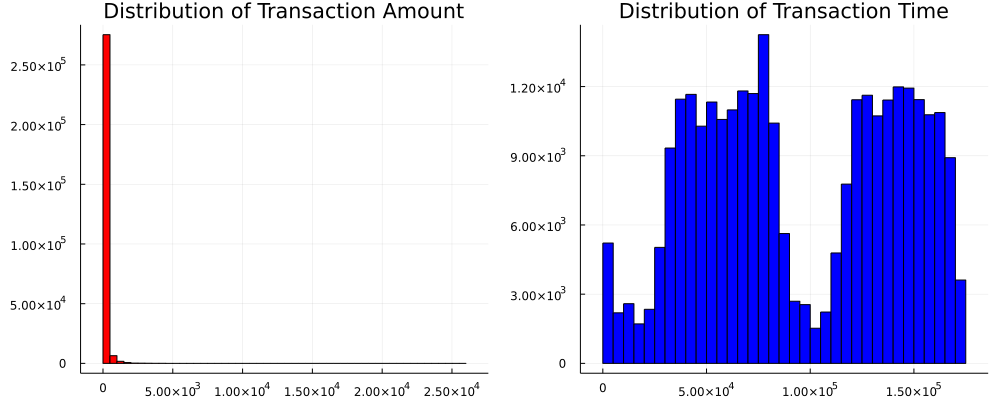

In [8]:
using StatsPlots


gr(size = (1000, 400))
p1 = histogram(
    df.Amount, bins=50, c=:red,
    title="Distribution of Transaction Amount",
    label="" # suppress showing the label
)
p2 = histogram(
    df.Time, bins=50, c=:blue,
    title="Distribution of Transaction Time",
    label="" # suppress showing the label
)
plot(p1, p2)

### Correlation matrix

In [9]:
fraud_df = df[df.Class .== 1, :]
non_fraud_df = df[df.Class .== 0, :]

println(size(fraud_df), size(non_fraud_df))

# Take a subsample of the non-fraud transactions
balanced_df = append!(fraud_df, first(non_fraud_df, nrow(fraud_df)))
println(size(balanced_df))

(492, 31)(284315, 31)
(984, 31)


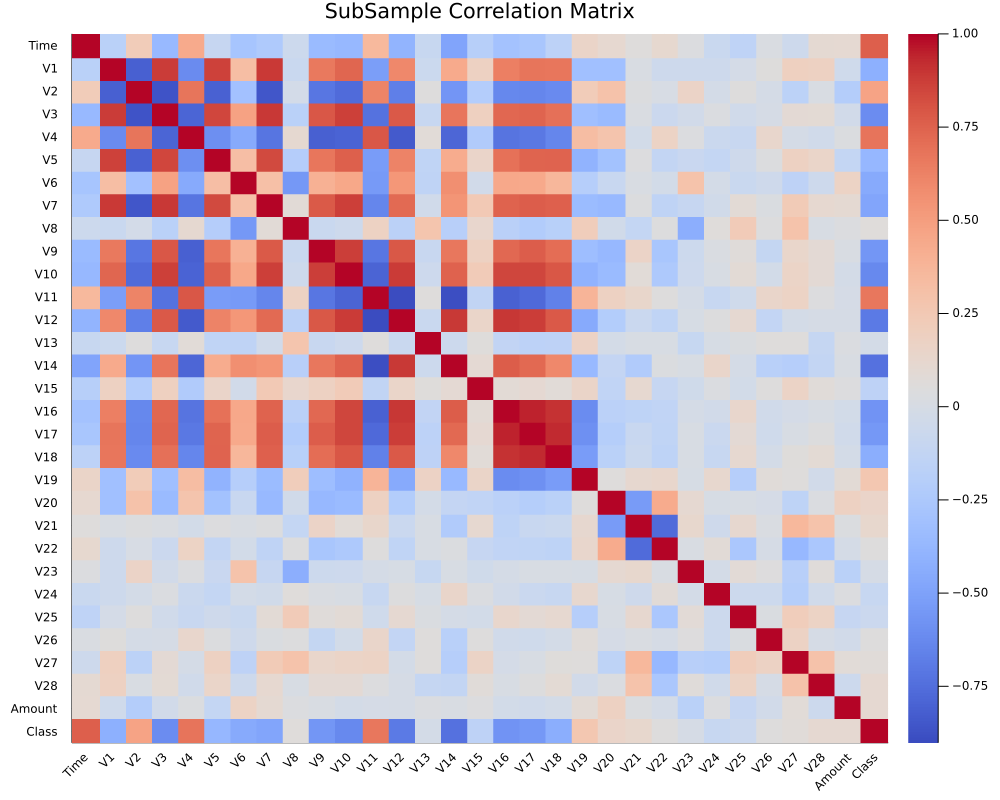

In [10]:
using Statistics
using Plots

M = cor(Matrix(balanced_df))

gr(size = (1000, 800))
heatmap(
    names(balanced_df), names(balanced_df), M,
    yflip=true, c=:coolwarm, ticks=:all, xrotation=45,
    title="SubSample Correlation Matrix"
)

### Positively correlated features

In [11]:
pos_features = select(balanced_df, :V2, :V4, :V11, :V19)
first(pos_features, 10)

,V2,V4,V11,V19
,Float64,Float64,Float64,Float64
1,1.95199,3.99791,3.20203,0.416956
2,-3.15731,2.28864,-0.414575,0.283345
3,1.75925,2.33024,2.03291,-1.33444
4,1.35837,2.67979,4.89584,0.308334
5,3.01974,4.7328,2.10134,-2.72185
6,4.13784,6.67573,5.66439,-1.93467
7,4.13246,6.34856,6.75463,-1.32736
8,3.71289,6.07827,4.56072,-2.3706
9,3.80908,6.04745,6.43905,-1.80801


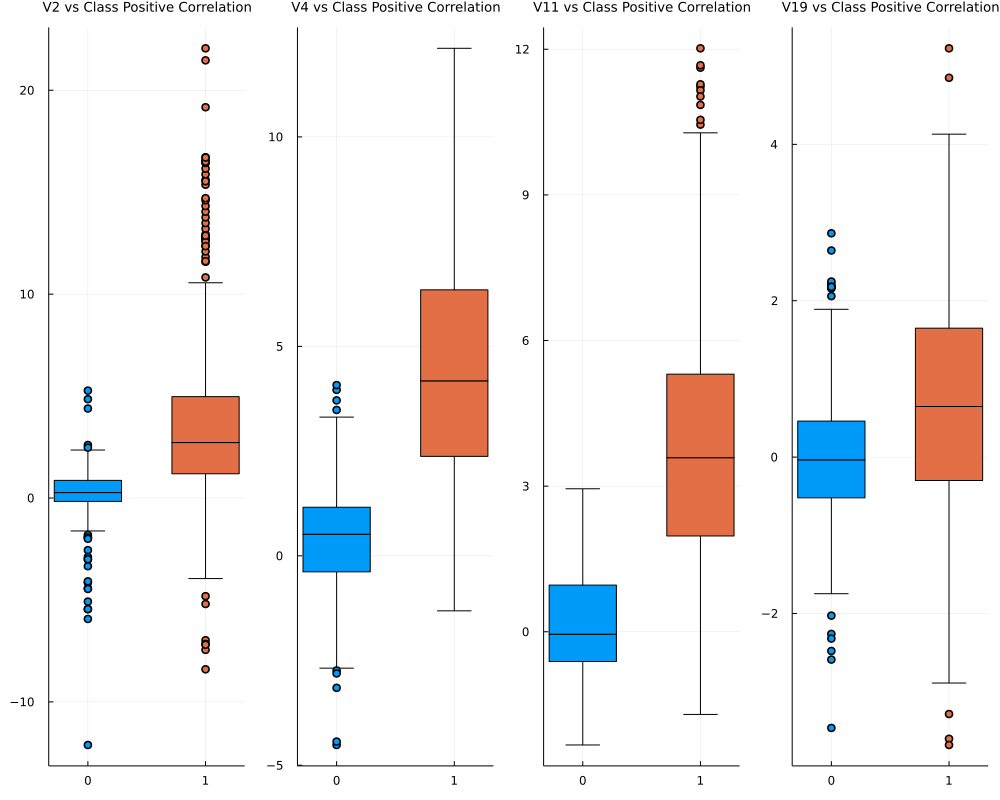

In [12]:
p1 = @df balanced_df boxplot(
    string.(:Class), :V2, label="", title="V2 vs Class Positive Correlation", group=(:Class)
)
p2 = @df balanced_df boxplot(
    string.(:Class), :V4, label="", title="V4 vs Class Positive Correlation", group=(:Class)
)
p3 = @df balanced_df boxplot(
    string.(:Class), :V11, label="", title="V11 vs Class Positive Correlation", group=(:Class)
)
p4 = @df balanced_df boxplot(
    string.(:Class), :V19, label="", title="V19 vs Class Positive Correlation", group=(:Class)
)

plot(p1, p2, p3, p4, layout = (1, 4), titlefontsize=9)

### Negatively correlated features

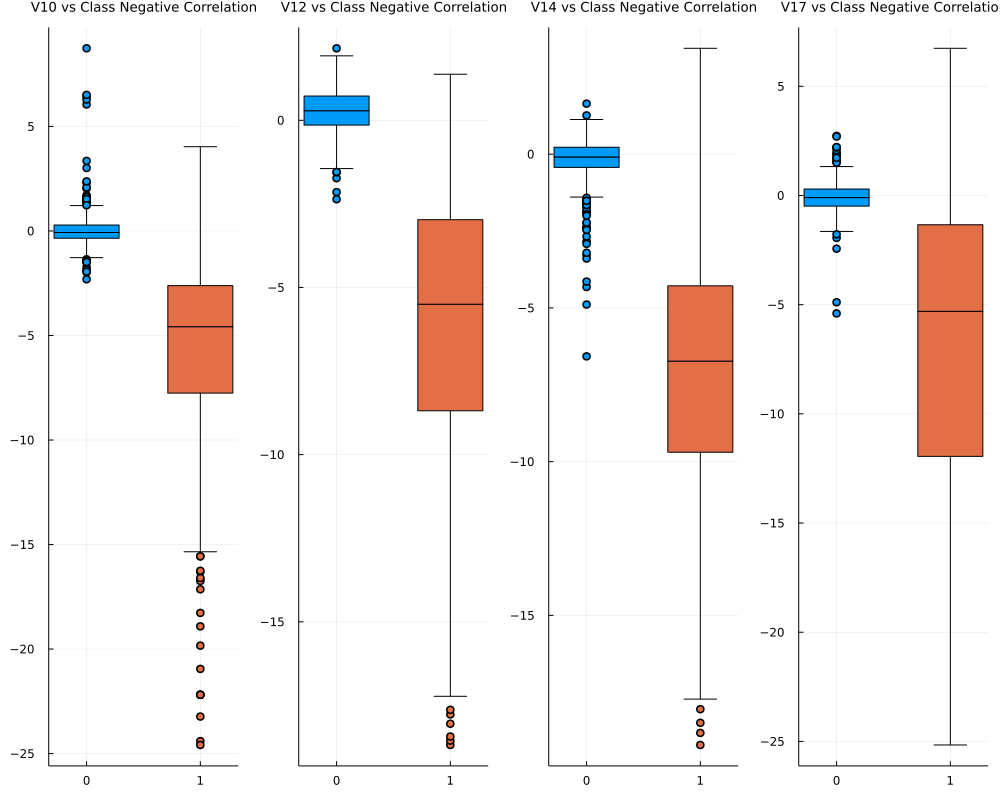

In [13]:
p1 = @df balanced_df boxplot(
    string.(:Class), :V10, label="", title="V10 vs Class Negative Correlation", group=(:Class)
)
p2 = @df balanced_df boxplot(
    string.(:Class), :V12, label="", title="V12 vs Class Negative Correlation", group=(:Class)
)
p3 = @df balanced_df boxplot(
    string.(:Class), :V14, label="", title="V14 vs Class Negative Correlation", group=(:Class)
)
p4 = @df balanced_df boxplot(
    string.(:Class), :V17, label="", title="V17 vs Class Negative Correlation", group=(:Class)
)

plot(p1, p2, p3, p4, layout = (1, 4), titlefontsize=9)

## Model Training

### Split data

In [14]:
# Convert dataframe to arrays
X = Array(df[!, Not(r"Class")])
X = transpose(X)
y = Array{Int64}(select(df, :Class))
y = vec(y)

size(X), size(y)

((30, 284807), (284807,))

In [15]:
# Reference
# https://discourse.julialang.org/t/simple-tool-for-train-test-split/473/5

using MLDataUtils
using Random

Random.seed!(42);
(X_train, y_train), (X_test, y_test) = stratifiedobs((X, y), p = 0.7)
X_train = transpose(X_train)
X_test = transpose(X_test)

println(size(X_train))
println(size(X_test))
println(size(y_train))
println(size(y_test))

(199364, 30)
(85443, 30)
(199364,)
(85443,)


### Scale features

In [16]:
num_features = size(X_train)[2]
X_train_scaled = copy(X_train)
X_test_scaled = copy(X_test)
for col in 1:num_features
    feature_mean = mean(X_train[:, col])
    feature_std = std(X_train[:, col])
    X_train_scaled[:, col] = [i-feature_mean for i in X_train[:, col]] / feature_std
    X_test_scaled[:, col] = [j-feature_mean for j in X_test[:, col]] / feature_std
end

println(size(X_train_scaled))
println(size(X_test_scaled))

(199364, 30)
(85443, 30)


In [17]:
X_train_scaled[1:10, 1]

10-element Vector{Float64}:
  1.5910508487109098
  0.9282185343197886
  1.2581388840548646
  1.5298070136738815
 -0.6863054760216893
  0.8859777743441292
 -0.9797786862266451
 -0.5479748874929212
  1.0914722246197313
 -0.6232498178635103

In [18]:
X_train[1:10, 1]

10-element Vector{Float64}:
 170424.0
 138962.0
 154622.0
 167517.0
  62327.0
 136957.0
  48397.0
  68893.0
 146711.0
  65320.0

### Upsampling

* Take note that the ClassImbalance package has a conflict with the DataFrameMacros package.
* Julia has problem sourcing Python from a virtual environment.

In [19]:
ENV["PYTHON"] = "/usr/bin/python3"
using PyCall

In [20]:
imbo = pyimport("imblearn.over_sampling")
sm = imbo.SMOTE(random_state=42)

PyObject SMOTE(random_state=42)

In [21]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/shenghao/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


([1.5910508487109098 0.9364342787548663 … -0.04244490789351109 -0.08974946688735465; 0.9282185343197886 -0.2085218381663446 … -0.41515126784571565 -0.2786175328977441; … ; -0.9923228905880076 0.6064989777462794 … 0.14483497368447992 -0.24808998601808; 0.2804159418870871 0.4946647056042586 … 1.110574433184344 -0.3526349440977356], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
size(X_train_sm), size(y_train_sm)

((398040, 30), (398040,))

### Model training

XGBoost package available @ https://github.com/dmlc/XGBoost.jl.

In [23]:
using XGBoost


dtrain = DMatrix(X_train_sm, label = y_train_sm)

DMatrix(Ptr{Nothing} @0x0000000004136140, XGBoost.var"#_setinfo#8"())

In [24]:
y_test_vec = Vector(y_test)
dtest = DMatrix(X_test_scaled, label = y_test_vec)

DMatrix(Ptr{Nothing} @0x0000000008cb8750, XGBoost.var"#_setinfo#8"())

In [25]:
param = [
    "eta" => 0.1,
    "objective" => "binary:logistic"
]


t = @time model = xgboost(dtrain, 1000, param=param, eval_set=dtest)
t

[14:41:04] WARNING: /workspace/srcdir/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.607968
[2]	train-logloss:0.538632
[3]	train-logloss:0.479631
[4]	train-logloss:0.430050
[5]	train-logloss:0.387388
[6]	train-logloss:0.350542
[7]	train-logloss:0.318076
[8]	train-logloss:0.289245
[9]	train-logloss:0.263714
[10]	train-logloss:0.241275
[11]	train-logloss:0.221595
[12]	train-logloss:0.203634
[13]	train-logloss:0.187515
[14]	train-logloss:0.173372
[15]	train-logloss:0.160772
[16]	train-logloss:0.149392
[17]	train-logloss:0.139281
[18]	train-logloss:0.129962
[19]	train-logloss:0.121601
[20]	train-logloss:0.114051
[21]	train-logloss:0.107028
[22]	train-logloss:0.101006
[23]	train-logloss:0.095391
[24]	train-logloss:0.090378
[25]	train-logloss:0.085699
[26]	train-logloss:0.081367
[27]	t

406.481611 seconds (1.07 M allocations: 58.923 MiB, 0.10% compilation time)


[703]	train-logloss:0.000038
[704]	train-logloss:0.000038
[705]	train-logloss:0.000038
[706]	train-logloss:0.000038
[707]	train-logloss:0.000038
[708]	train-logloss:0.000037
[709]	train-logloss:0.000037
[710]	train-logloss:0.000037
[711]	train-logloss:0.000037
[712]	train-logloss:0.000037
[713]	train-logloss:0.000037
[714]	train-logloss:0.000037
[715]	train-logloss:0.000037
[716]	train-logloss:0.000037
[717]	train-logloss:0.000037
[718]	train-logloss:0.000036
[719]	train-logloss:0.000036
[720]	train-logloss:0.000036
[721]	train-logloss:0.000036
[722]	train-logloss:0.000036
[723]	train-logloss:0.000036
[724]	train-logloss:0.000036
[725]	train-logloss:0.000036
[726]	train-logloss:0.000036
[727]	train-logloss:0.000036
[728]	train-logloss:0.000036
[729]	train-logloss:0.000036
[730]	train-logloss:0.000036
[731]	train-logloss:0.000035
[732]	train-logloss:0.000035
[733]	train-logloss:0.000035
[734]	train-logloss:0.000035
[735]	train-logloss:0.000035
[736]	train-logloss:0.000035
[737]	train-lo

Booster(Ptr{Nothing} @0x0000000007a4f270)

### Model evaluation

In [27]:
y_pred_prob = XGBoost.predict(model, X_test_scaled)
y_pred_prob

85443-element Vector{Float32}:
 5.440553f-10
 1.7904745f-9
 1.0023576f-9
 8.4523616f-10
 4.906141f-9
 1.1041555f-8
 1.8492676f-8
 1.7865217f-8
 2.5784157f-9
 8.936012f-9
 5.119947f-8
 1.5632291f-7
 1.9684326f-7
 ⋮
 4.1654222f-10
 2.7877476f-8
 9.956874f-12
 6.5530568f-9
 5.4603393f-9
 3.7065204f-10
 4.941704f-10
 1.833124f-8
 4.4066257f-7
 5.9354174f-11
 7.0437284f-10
 4.6660443f-7
 6.582194f-9

In [53]:
# using MLJBase


# @doc AreaUnderCurve
# info(AreaUnderCurve)

In [28]:
using EvalMetrics

# AreaUnderCurve(y_pred_prob, y_test_vec)
binary_eval_report(y_test_vec, y_pred_prob)

Dict{String, Real} with 8 entries:
  "precision@fpr… => 0.0309091
  "recall@fpr0.0… => 0.918919
  "accuracy@fpr0… => 0.949955
  "au_prcurve"    => 0.721061
  "samples"       => 85443
  "true negative… => 0.950009
  "au_roccurve"   => 0.971556
  "prevalence"    => 0.00173215

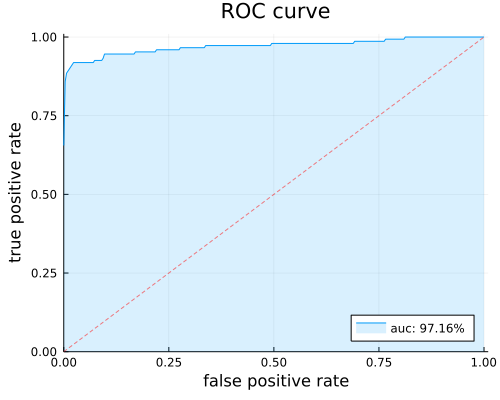

In [29]:
gr(size = (500, 400))
rocplot(y_test_vec, y_pred_prob)

In [30]:
# Calculate precision, recall scores
precision(y_test_vec, y_pred_prob, 0.5), EvalMetrics.recall(y_test_vec, y_pred_prob, 0.5)

(0.8531468531468531, 0.8243243243243243)

## Export Model

In [36]:
typeof(model)

Booster

In [39]:
using JLD2


model_dir = "models/fraud_detect_xgbmodel.jld2"
save_object(model_dir, model)

In [41]:
loaded_model = load_object(model_dir)
typeof(loaded_model)

Booster

In [42]:
y_pred_prob = XGBoost.predict(loaded_model, X_test_scaled)
y_pred_prob

LoadError: Call to XGBoost C function XGBoosterPredict failed: [15:17:09] /workspace/srcdir/xgboost/src/c_api/c_api.cc:675: DMatrix/Booster has not been initialized or has already been disposed.
Stack trace:
  [bt] (0) /home/shenghao/.julia/artifacts/cec180bd4d0d5762169f7d2a1f732c946fca492e/lib/libxgboost.so(+0xfedf7) [0x7ff1444dedf7]
  [bt] (1) /home/shenghao/.julia/artifacts/cec180bd4d0d5762169f7d2a1f732c946fca492e/lib/libxgboost.so(XGBoosterPredict+0x167) [0x7ff1444e1fb7]
  [bt] (2) [0x7ff1875ea188]
  [bt] (3) [0x7ff1875ea5a3]
  [bt] (4) [0x7ff1875ea741]
  [bt] (5) /opt/julia-1.7.1/bin/../lib/julia/libjulia-internal.so.1(jl_apply_generic+0x1fa) [0x7ff228e0de0a]
  [bt] (6) /opt/julia-1.7.1/bin/../lib/julia/libjulia-internal.so.1(+0xe3e96) [0x7ff228e2ce96]
  [bt] (7) /opt/julia-1.7.1/bin/../lib/julia/libjulia-internal.so.1(+0xe390e) [0x7ff228e2c90e]
  [bt] (8) /opt/julia-1.7.1/bin/../lib/julia/libjulia-internal.so.1(+0xe46d2) [0x7ff228e2d6d2]



## References

* Installing Julia on Ubuntu
https://medium.com/coffee-in-a-klein-bottle/install-julia-1-5-on-ubuntu-bb8be4b2571d

* [Solved] jupyter-lab: command not found on Ubuntu
https://ashley-tharp.medium.com/solved-jupyter-lab-command-not-found-on-ubuntu-820d5e97510d